# 1. Environment Setup

## 1.1 Import necessary libraries

In [ ]:
# Import pandas, numpy, seaborn, matplotlib, etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

## 1.2 Import Dataset

In [ ]:
# Load Palmer Penguins Dataset from Github repository
penguins = pd.read_csv ("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/refs/heads/main/inst/extdata/penguins.csv")


# 2. Exploratory Data Analysis (EDA)

## 2.1 Initial Overview

### 2.1.1 Identify Shape (Total Rows & Columns)


In [ ]:
# Print shape of the dataset
penguins.shape

(344, 8)

### 2.1.2 Full Dataset

In [ ]:
# Print full dataset
print("Full Dataset:")
penguins

Full Dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### 2.1.3 Data Type

In [ ]:
# Print Data Type Information
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### 2.1.4 Summary Statistics

In [ ]:
# Print summary information of dataset
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### 2.1.5 Class Distribution (Species)

In [ ]:
# Print the number of samples per each penguin species
print("\nClass distribution:")
print(penguins['species'].value_counts())


Class distribution:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### 2.1.6 Missing Values

In [ ]:
# Checking missing values
penguins.isnull().sum()



,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [ ]:
# Count rows with missing values
missing_rows = penguins.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows}")

Number of rows with missing values: 11


## 2.2 Cleaning dataset

**Information to help with analysis and justification later:

 There are only 11 rows in the dataset with missing values
Therefore, 333 out of 344 rows have no missing values
2 ways to clean data:

 1) Drop empty rows

 2) Fill empty values with average values



  * If we use Fill empty values method, the newly data is not fully accurate (Since it uses averages, etc)

  * Since this is classification, original, actual records are more useful for accurately classifying

  * Since we still have 333 full records, it is still sufficient to properly do classification (As original is 344)

Hence due to the size of the dataset, dropping the empty 11 records will not have a significant impact and would be better for this classification problem



In [ ]:
# Drop empty rows
penguins_cleaned = penguins.dropna()

## 2.3 Updated Overview

** Compare these with 'Initial Overview' for analysis

### 2.3.1 Identify Shape (Total Rows & Columns)

In [ ]:
# Print shape of the cleaned dataset
penguins_cleaned.shape

(333, 8)

### 2.3.2 Full Cleaned Dataset

In [ ]:
# Print cleaned dataset
penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### 2.3.3 Summary Statistics

In [ ]:
## Skipped "Data Type" section because the columns and data types remain unchanged so, unnecessary

# Print summary information of cleaned dataset
penguins_cleaned.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### 2.3.4 Class Distribution (Species)

In [ ]:
# Print the number of samples per each penguin species for cleaned dataset
print("\n Updated Class distribution:")
print(penguins_cleaned['species'].value_counts())


 Updated Class distribution:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


### 2.3.5 Re-check for Missing Values

In [ ]:
#Checking missing values on the cleaned dataset to ensure the dataset is complete
penguins_cleaned.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


## 2.4 EDA Visualizations

** The EDA Visualizations are generated for the cleaned data

In [ ]:
# Removing the Year column because the Year of study is less relevant to the classification
ctp = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Filter for Adelie penguins
adelie = penguins_cleaned[penguins_cleaned['species'] == 'Adelie']

# Filter for Gentoo penguins
gentoo = penguins_cleaned[penguins_cleaned['species'] == 'Gentoo']

# Filter for Chinstrap penguins
chinstrap = penguins_cleaned[penguins_cleaned['species'] == 'Chinstrap']

### 2.4.1 Class Distribution


Class Distribution Pie Chart: 



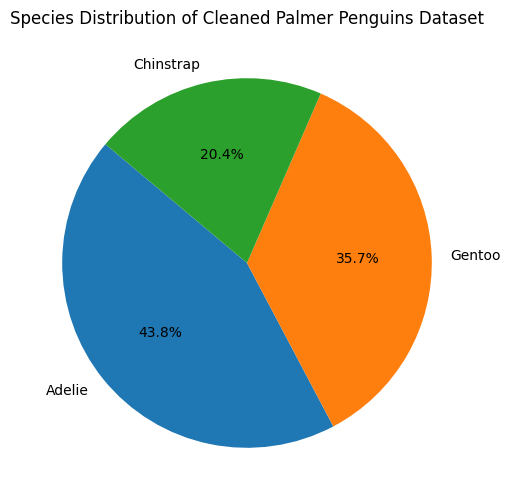




Class Distribution Count 



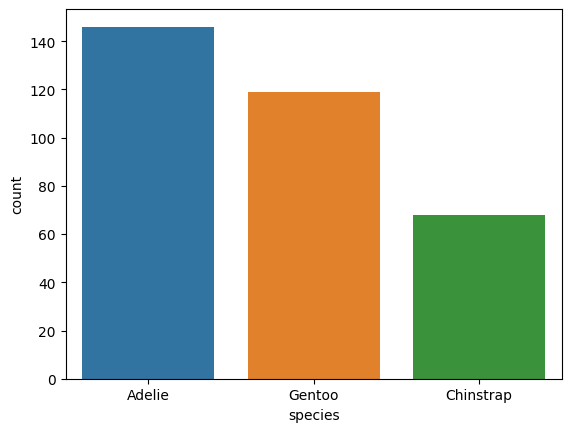

In [ ]:
# Pie chart of class distribution
print("\nClass Distribution Pie Chart: \n")
species_counts = penguins_cleaned['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Species Distribution of Cleaned Palmer Penguins Dataset")
plt.show()

print("\n\n")

# Count plot of class distribution
print("Class Distribution Count \n")
sns.countplot(x='species', data=penguins_cleaned, hue="species" )
plt.show()

### 2.4.2 Pairplot


Pairplot of penguin features:


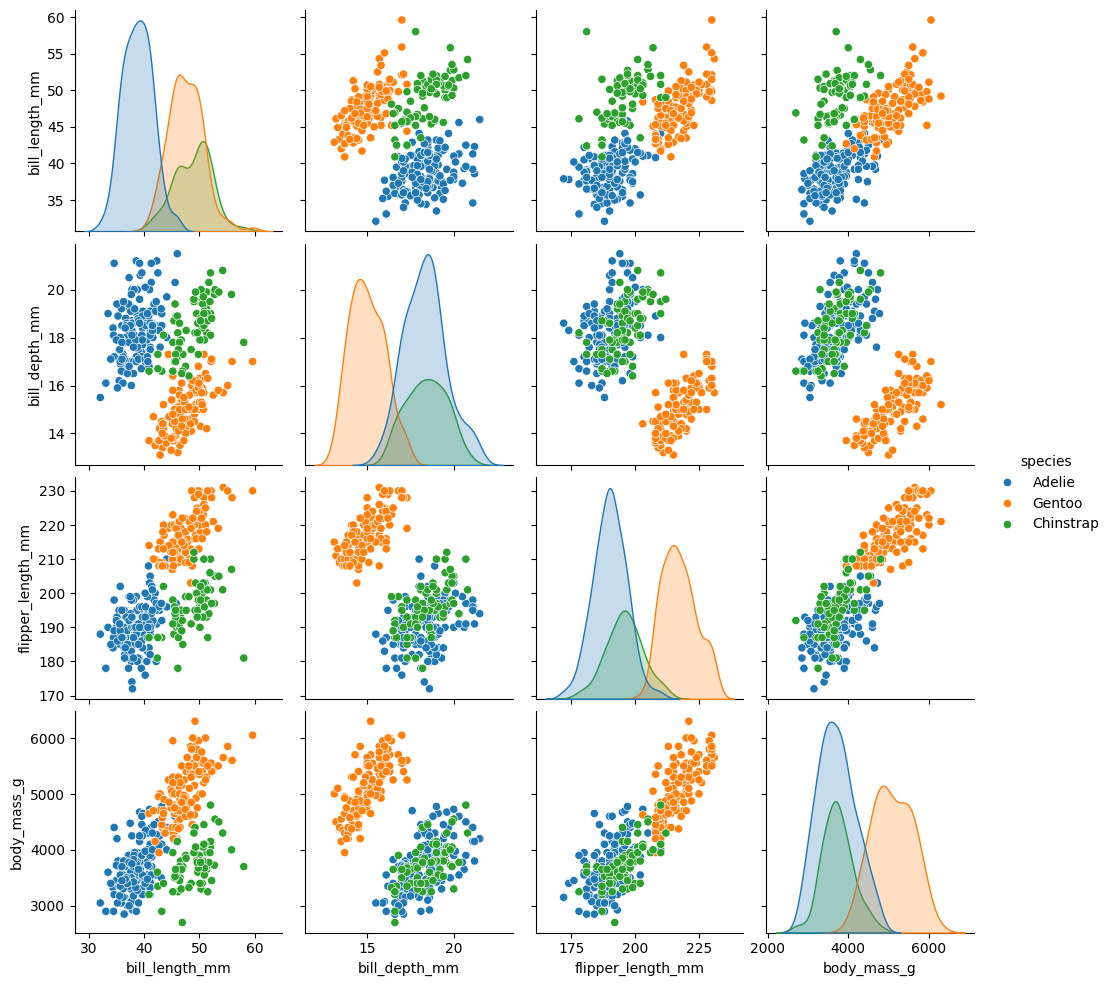

In [ ]:
# Visualize pairplots to see the distribution of features for each species of penguins
print("\nPairplot of penguin features:")
sns.pairplot(penguins_cleaned, hue="species", vars=ctp)
plt.show()

### 2.4.3 Histogram of Features

** Not sure if necessary to discuss all

** Might be better to either discuss Only the general dataset histograms, or Specific species one.

** Only need to analyse in detail for histograms with a noticable skewnewss

#### 2.4.3.1 General Dataset


Histograms of each feature:


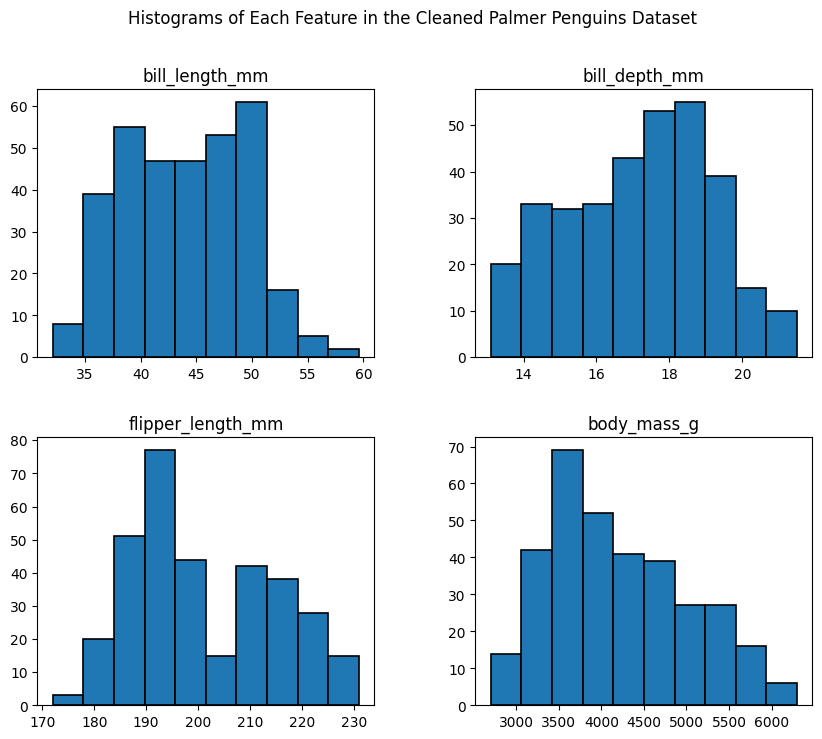

In [ ]:
# For analysis, talk about the skewness
# Most seem to be symmetrical
# bill depth is sort of symmentrical too but kind of to the left? (Negative skew) so, most have deeper bills
# body mass is skewed to the right (Positive Skew) so, most penguins are lighter in weight

# Histograms for each feature
print("\nHistograms of each feature:")


penguins_cleaned[ctp].hist(edgecolor='black', linewidth=1.2, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Each Feature in the Cleaned Palmer Penguins Dataset")
plt.show()

#### 2.4.3.2 Specific Species

##### Adelie Penguins

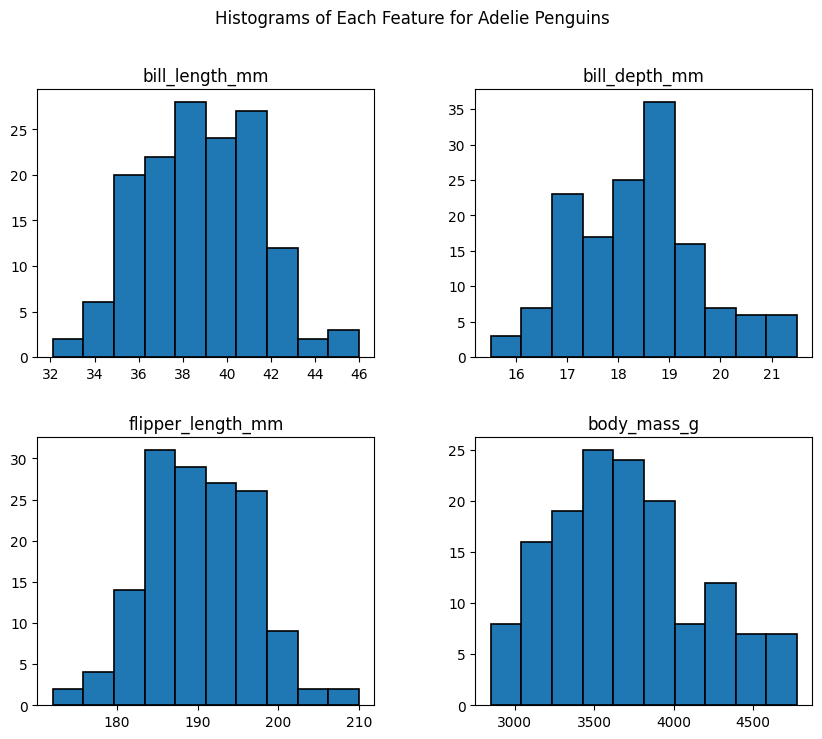

In [ ]:
# Create histograms
adelie[ctp].hist(edgecolor='black', linewidth=1.2, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Each Feature for Adelie Penguins")
plt.show()

##### Gentoo Penguins

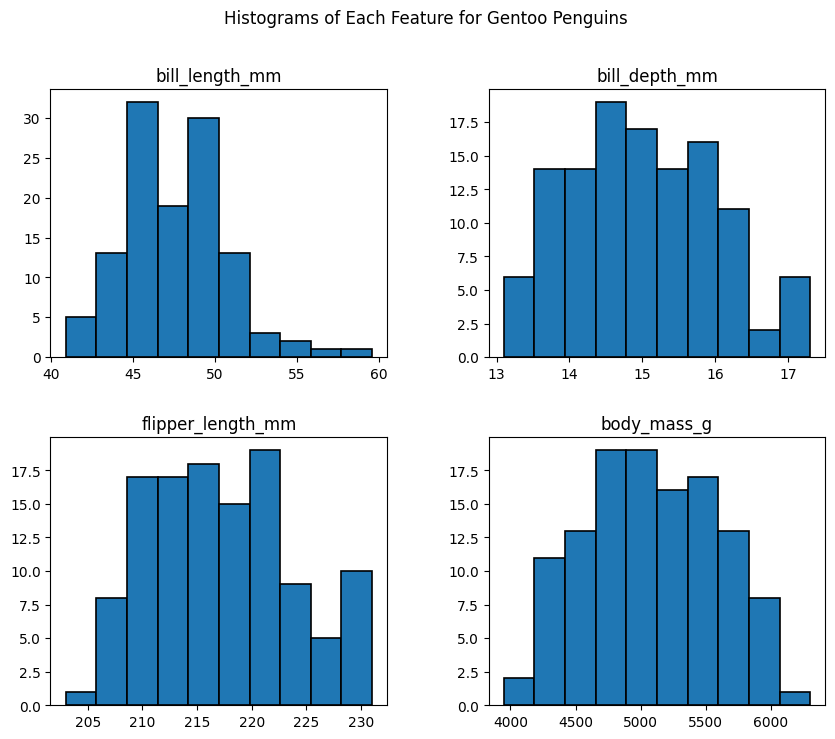

In [ ]:
# Create histograms
gentoo[ctp].hist(edgecolor='black', linewidth=1.2, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Each Feature for Gentoo Penguins")
plt.show()

##### Chinstrap Penguins

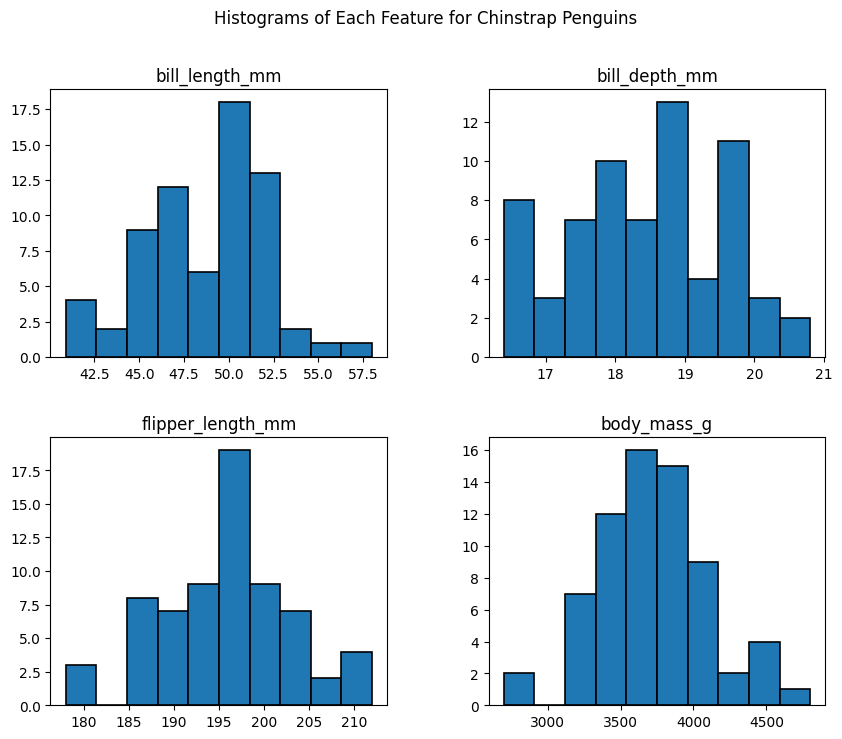

In [ ]:
# Create histograms
chinstrap[ctp].hist(edgecolor='black', linewidth=1.2, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Each Feature for Chinstrap Penguins")
plt.show()

### 2.4.4 Box Plots of Features (Based on Species)


Box Plots of features grouped by species:


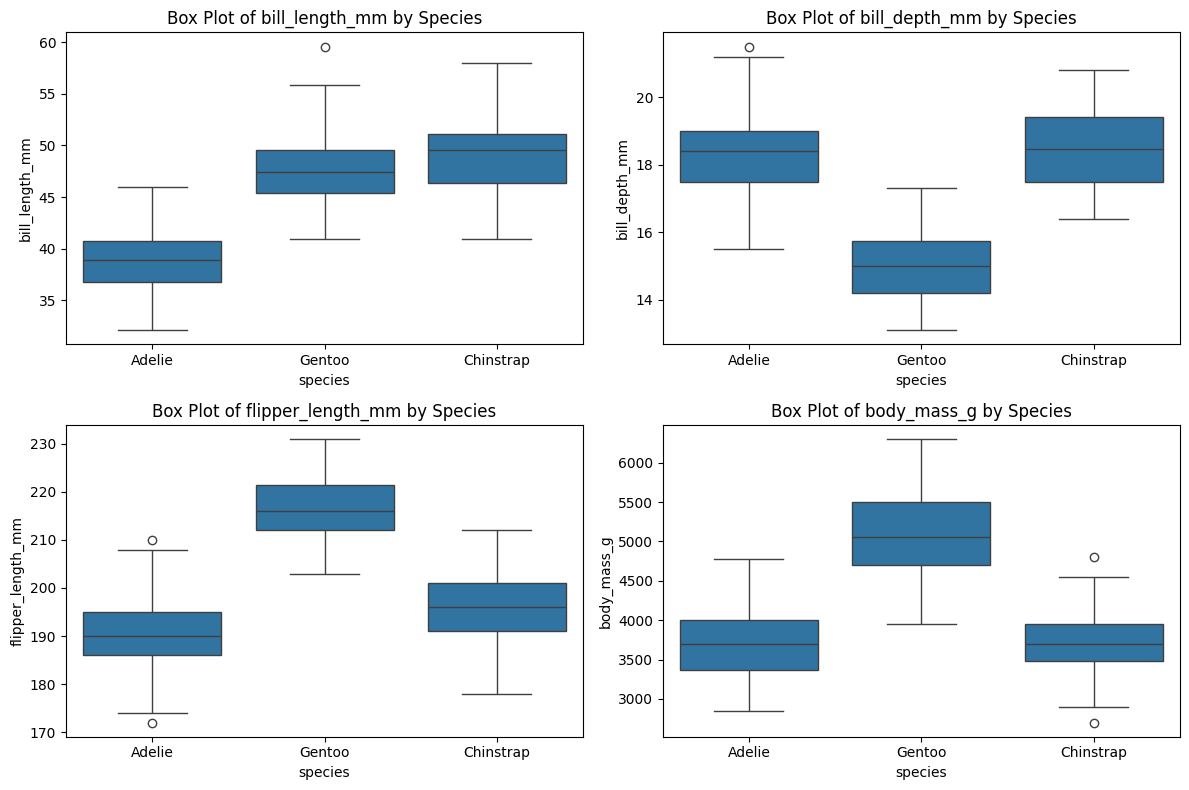

In [ ]:
# Box Plots to see the distribution of each feature for each penguin species
print("\nBox Plots of features grouped by species:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(penguins_cleaned[ctp]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=col, data=penguins_cleaned)
    plt.title(f'Box Plot of {col} by Species')
plt.tight_layout()
plt.show()

### 2.4.5 Violin Plots of Features (Based on Species)


Violin plots of features grouped by species:


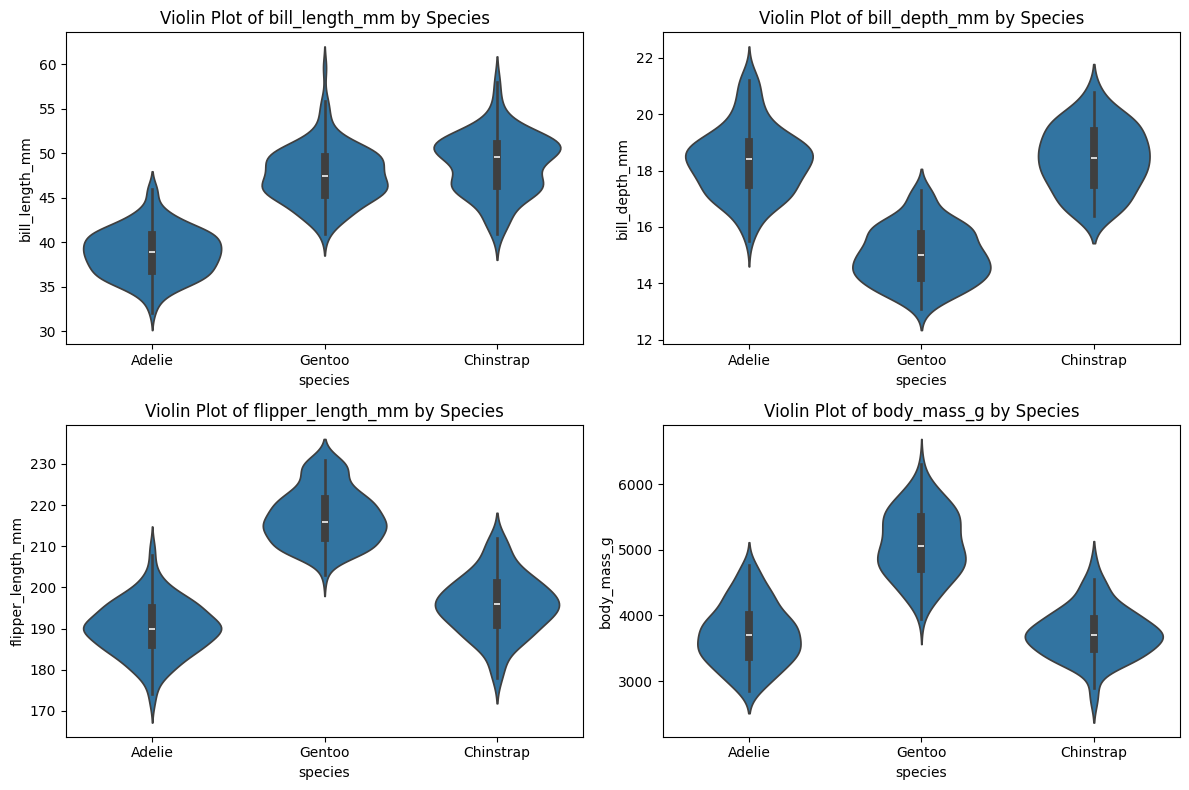

In [ ]:
# Similar to Box plot so, might not need to analyse in depth?

# Violin plots to visualize the density of each feature for each penguin species
print("\nViolin plots of features grouped by species:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(penguins_cleaned[ctp]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=col, data=penguins_cleaned)
    plt.title(f'Violin Plot of {col} by Species')
plt.tight_layout()
plt.show()

### 2.4.6 Heatmap


Correlation heatmap: 



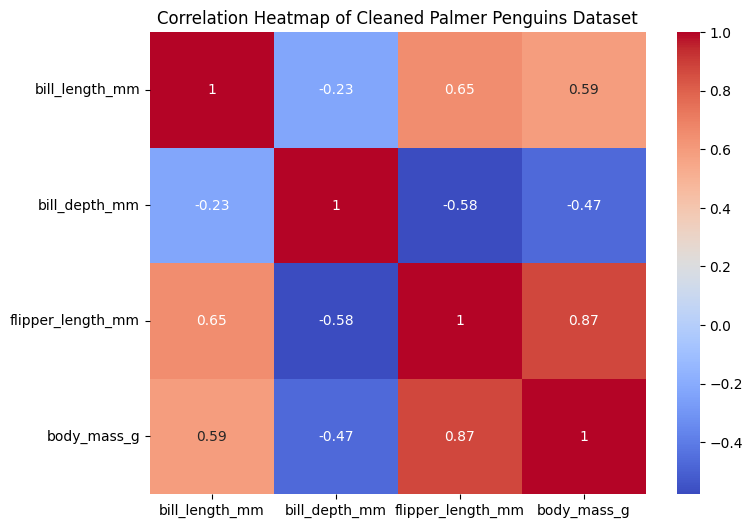

In [ ]:
# Heatmap of correlations between numeric features
print("\nCorrelation heatmap: \n")

# Drop the non-numeric columns to avoid errors in the heatmap
numeric_penguins = penguins_cleaned.drop(columns=['species', 'year', 'sex', 'island'])

# Calculate the correlation matrix
correlation_matrix = numeric_penguins.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Cleaned Palmer Penguins Dataset")
plt.show()

# 3. Methodology

** Will be using Decision Trees and KNN

** Linear regression not suitable since it is a classification problem, not a regression problem

** Need to decide which is better between Decision Tree later based on Accuracy

In [ ]:
# Prepare the dataset for Machine Learning activities
penguins_cleaned =  {
    'attributes': penguins_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']],
    'target': pd.DataFrame(penguins_cleaned['species'], columns=['species']),
    'targetNames': penguins_cleaned['species'].unique()
}


# Split data into training and testing sets (70% Train, 30% Test)
x_train, x_test, y_train, y_test \
= train_test_split(penguins_cleaned['attributes'], penguins_cleaned['target'], test_size=0.3, random_state=1)
penguins_cleaned['train'] = {
    'attributes': x_train,
    'target': y_train
}
penguins_cleaned['test'] = {
    'attributes': x_test,
    'target': y_test
}

## 3.1 Decision Trees

### 3.1.1 Initiate Classifier & Train the Model

Instantiate classifier object based on Gini Impurity Metric

In [ ]:
# Instantiate classifier object based on Gini Impurity Metric
dtc = DecisionTreeClassifier(criterion='gini')

Train the Decision Tree Model with the training data

In [ ]:
# Train the model with the training data
dtc.fit(penguins_cleaned['train']['attributes'], penguins_cleaned['train']['target'])

DecisionTreeClassifier()

### 3.1.2 Predict & Compare Output with Actual Values

Predict the penguin species based on the testing data.

In [ ]:
# Output predicted values of penguin species for testing
predicts = dtc.predict(penguins_cleaned['test']['attributes'])
predicts

array(['Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 

Compare the Predicted Values against the Actual Target Values

In [ ]:
# Compare Predicted Values against Actual Target Values
pd.DataFrame(list(zip(penguins_cleaned['test']['target'].species,predicts)), columns=['target', 'predicted'])

,target,predicted
0,Adelie,Adelie
1,Chinstrap,Chinstrap
2,Gentoo,Gentoo
3,Gentoo,Gentoo
4,Chinstrap,Adelie
...,...,...
95,Adelie,Adelie
96,Adelie,Adelie
97,Adelie,Adelie
98,Adelie,Adelie


### 3.1.3 Decision Tree Visualization

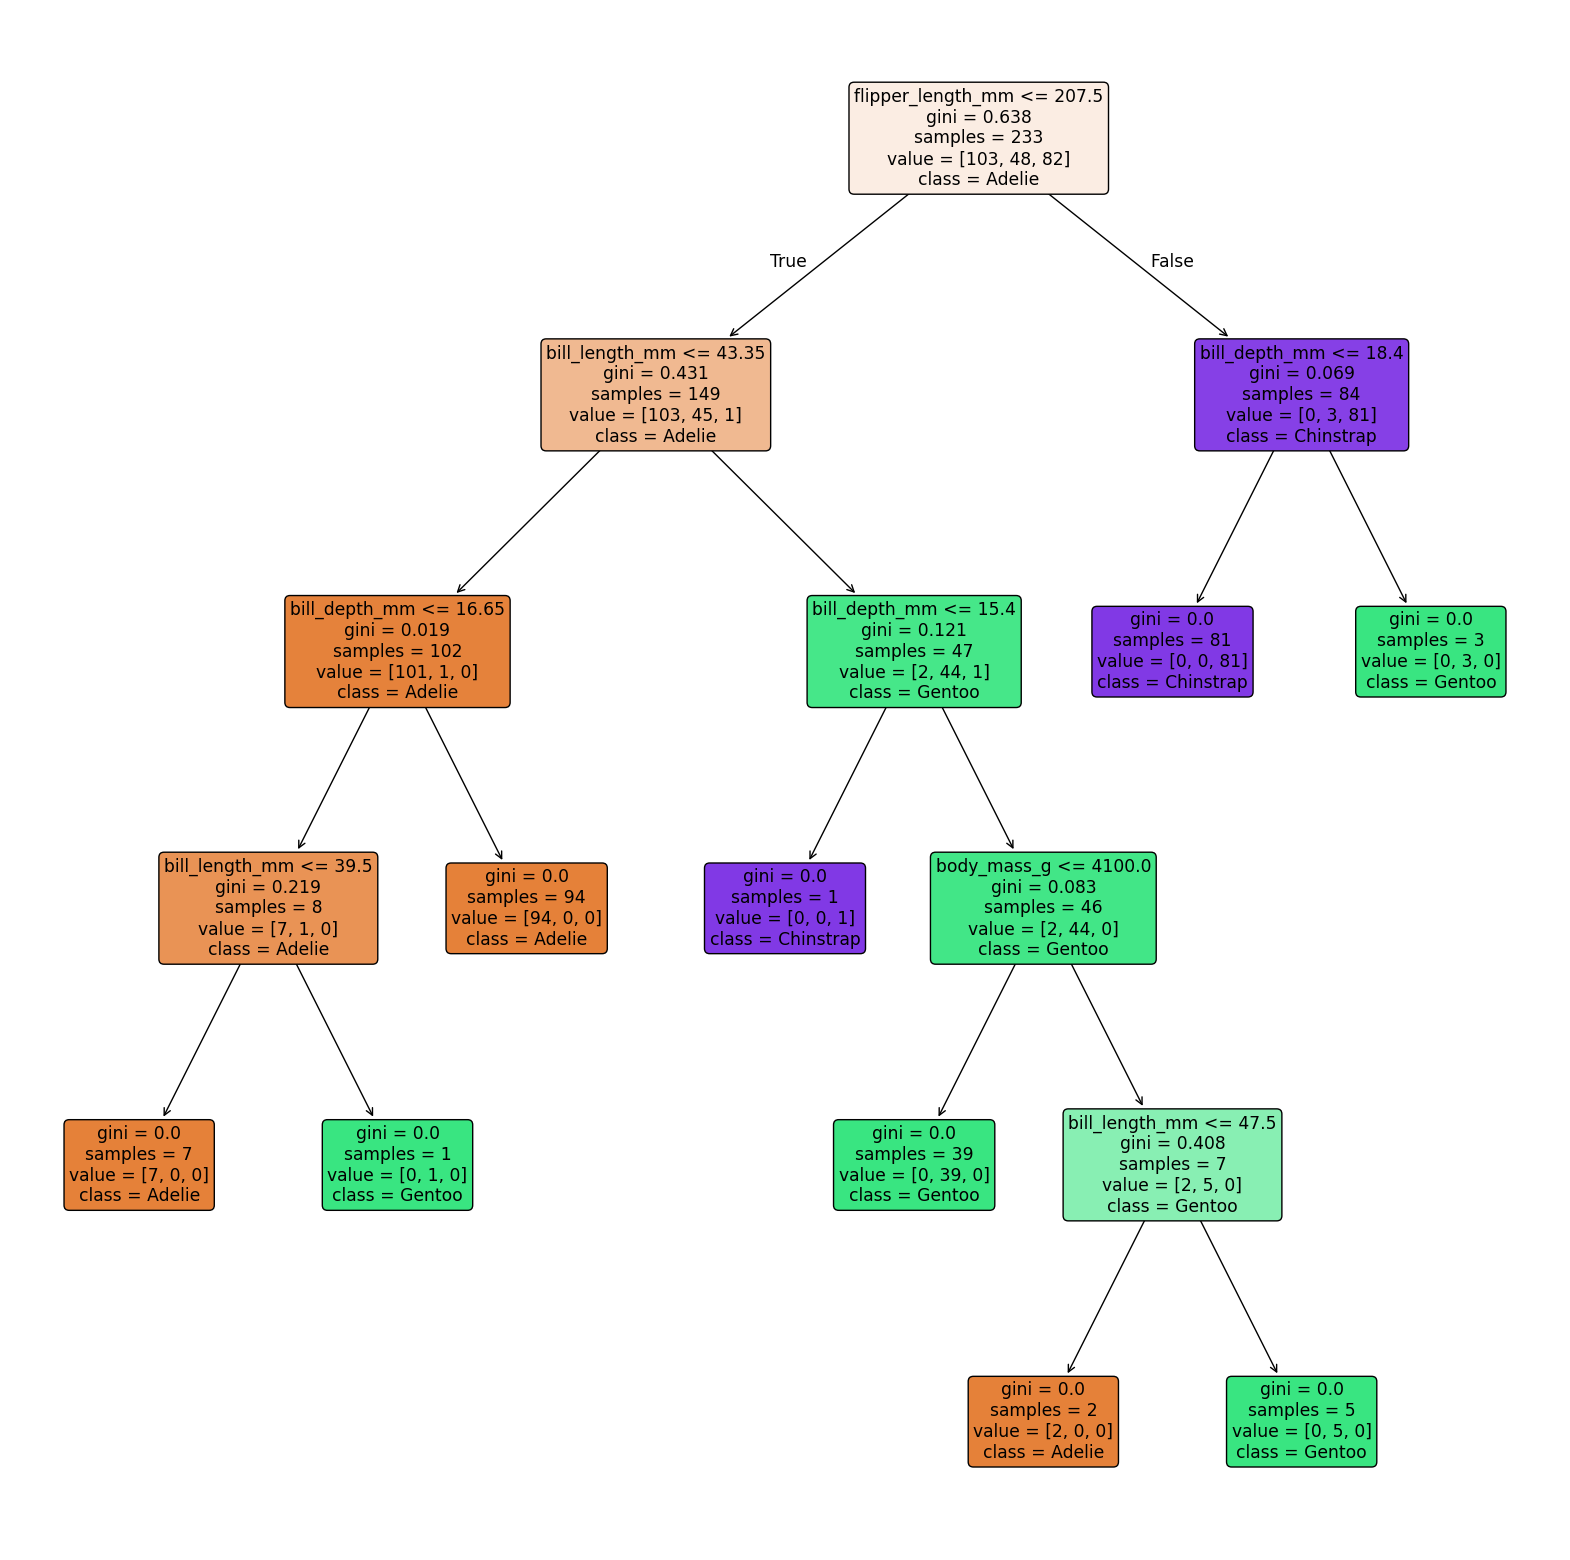

In [ ]:
# Plot the decision tree
plt.figure(figsize=[20,20])
tree = plot_tree(dtc, feature_names=penguins_cleaned['attributes'].columns.tolist(), class_names=penguins_cleaned['targetNames'], filled=True, rounded=True)

## 3.2 KNN

### 3.2.1 Initiate Classifier & Train the Model

Initiate classifier object with k value of 5

In [ ]:
# Initiate classifier object with k=5
knc = KNeighborsClassifier(5)

Train the KNN Classifier Model with the training data

In [ ]:
# Train the model with the training data
x_train1 = penguins_cleaned['train']['attributes'][ctp]
y_train1 = penguins_cleaned['train']['target'].species
knc.fit(x_train1, y_train1)

KNeighborsClassifier()

### 3.2.2 Predict & Compare Output with Actual Values

Predict the penguin species based on the testing data and Compare with Actual Values

In [ ]:
# Test the classifier
x_test1 = penguins_cleaned['test']['attributes'][ctp]
y_test1 = penguins_cleaned['test']['target'].species
y_predict1 = knc.predict(x_test1)

# Output Predicted Values against the Actual Target Values
print(pd.DataFrame(list(zip(y_test1, y_predict1)), columns=['target', 'predicted']))

       target  predicted
0      Adelie     Adelie
1   Chinstrap  Chinstrap
2      Gentoo     Gentoo
3      Gentoo     Gentoo
4   Chinstrap     Adelie
..        ...        ...
95     Adelie     Adelie
96     Adelie  Chinstrap
97     Adelie     Adelie
98     Adelie     Adelie
99     Adelie     Adelie

[100 rows x 2 columns]


# 4. Results

*** Mainly can use Accuracy, Precision, Recall (Sensitivity) and F1 Score in the Classification Report to compare the results

## 4.1 Decision Tree

### 4.1.1 Accuracy of Predicted Values

In [ ]:
# Calculate accuracy of Predicted Values against Actual Target Values
accuracy = dtc.score(penguins_cleaned['test']['attributes'],penguins_cleaned['test']['target'].species)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9400


### 4.1.2 Confusion Matrix and Classification Report

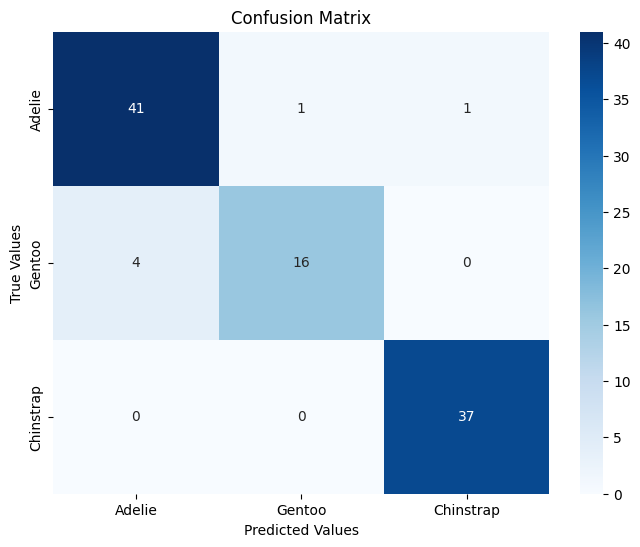


 

Classification Report: 

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        43
      Gentoo       0.94      0.80      0.86        20
   Chinstrap       0.97      1.00      0.99        37

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
# Display the confusion matrix to show the prediction results against actual target
cm = confusion_matrix(y_test, predicts)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=penguins_cleaned['targetNames'],
            yticklabels=penguins_cleaned['targetNames'])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()
print("\n \n")


# Print the classification report
report = classification_report(y_test, predicts, target_names=penguins_cleaned['targetNames'])
print("Classification Report: \n")
print(report)

## 4.2 KNN

### 4.2.1 Accuracy of Predicted Values


In [ ]:
# Calculate accuracy of Predicted Values against Actual Target Values
print(f'Accuracy: {knc.score(x_test1,y_test1):.4f}')

Accuracy: 0.8200


### 4.2.2 Confusion Matrix and Classification Report

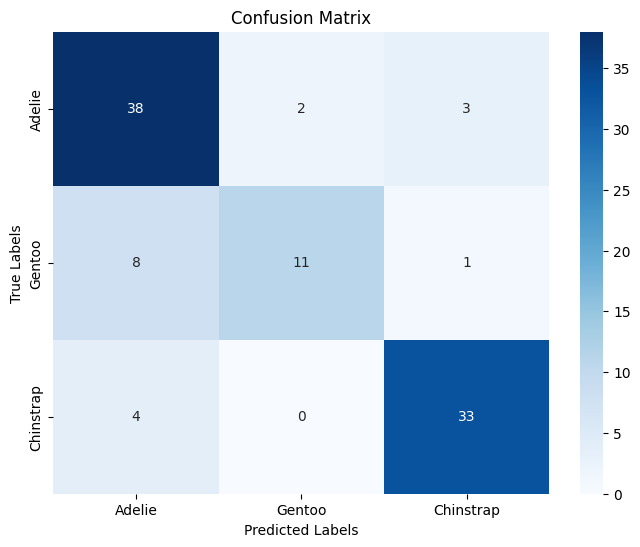


 


Classification Report: 

              precision    recall  f1-score   support

      Adelie       0.76      0.88      0.82        43
      Gentoo       0.85      0.55      0.67        20
   Chinstrap       0.89      0.89      0.89        37

    accuracy                           0.82       100
   macro avg       0.83      0.78      0.79       100
weighted avg       0.83      0.82      0.81       100



In [ ]:
# Display the confusion matrix to show the prediction results against actual target
cm1 = confusion_matrix(y_test1, y_predict1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=penguins_cleaned['targetNames'], yticklabels=penguins_cleaned['targetNames'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("\n \n")


# Print the classification report
print("\nClassification Report: \n")
print(classification_report(y_test1, y_predict1, target_names=penguins_cleaned['targetNames']))

### 4.2.3 Compare Accuracy with Different Values of k

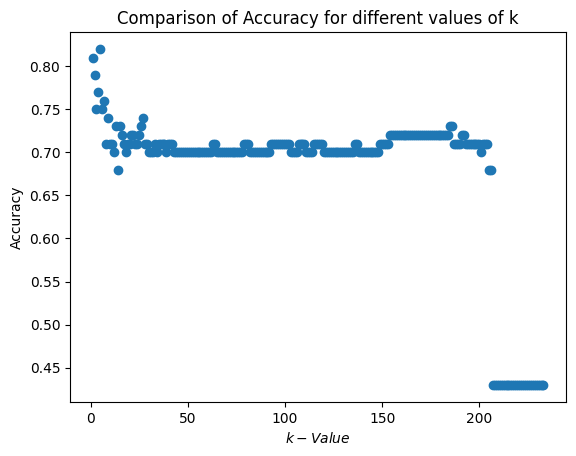



Best k: 5, Accuracy: 0.82


In [ ]:
# Loop to compare accuracy of prediction at different values of k
k_list = []
accuracy_list = []
for k in range(1, len(x_train1)+1):
    k_list.append(k)
    knc = KNeighborsClassifier(k)
    knc.fit(x_train1, y_train1)
    accuracy_list.append(knc.score(x_test1, y_test1))

# Plot accuracy vs. k
plt.figure()
plt.scatter(k_list, accuracy_list)
plt.xlabel('$k-Value$')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for different values of k')
plt.show()
print("\n")

# Find the index of the maximum accuracy
max_accuracy_index = accuracy_list.index(max(accuracy_list))
best_k = k_list[max_accuracy_index]
print(f"Best k: {best_k}, Accuracy: {accuracy_list[max_accuracy_index]}")
